In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
filename = 'country_vaccinations.csv'

# Load the data in as a pandas data frame

In [40]:
data = pd.read_csv(filename)

# Print the columns for the data frame and the unique values for the countries.

In [41]:
print(data.columns)

SyntaxError: invalid syntax (1627089579.py, line 2)

In [42]:
print(data['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada

# Create a new pandas data frame for Portugal

In [43]:
newdata = data[data['country']=='Portugal']

In [44]:
# Plot the people_vaccinated_per_hundred against the data

SyntaxError: invalid syntax (2129277621.py, line 2)

/var/folders/sm/33wx21p95j9479zfzh0bt80h0000gn/T/ipykernel_90189/2726415297.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newdata['date'], rotation=-45, ha='left')


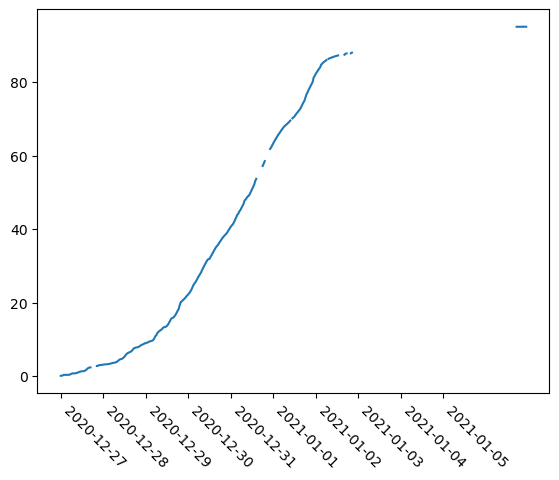

In [49]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(newdata['date'],newdata['people_vaccinated_per_hundred'])

ax.set_xticklabels(newdata['date'], rotation=-45, ha='left')
ax.set_xticks(np.arange(0, 439, 40))

copy the column 'total_vaccinations' from the pandas data frame to a numpy array

In [47]:
datanum = np.asarray(newdata['total_vaccinations'])

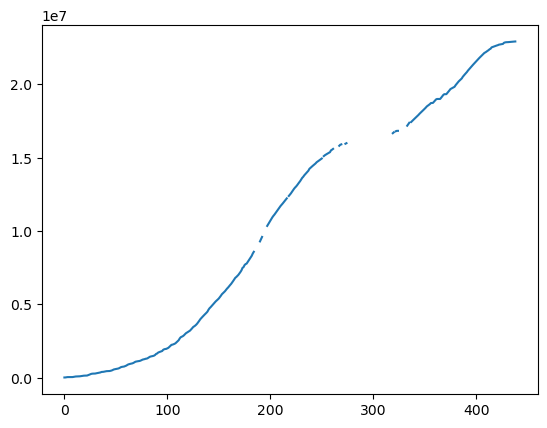

In [48]:
plt.plot(datanum)

# use the function below to remover the nan
When the data was loaded in some items were not complete, so they were converted to nan.  The code below will interpolate the data between nans.

In [50]:
# Making sequences for interp
def cleanNAN(datanum):
    ok = ~np.isnan(datanum)
    xp = ok.ravel().nonzero()[0]
    fp = datanum[~np.isnan(datanum)]
    x  = np.isnan(datanum).ravel().nonzero()[0]

    # Replacing nan values
    datanum[np.isnan(datanum)] = np.interp(x, xp, fp)
    return datanum

# Once you have the clean data plot it

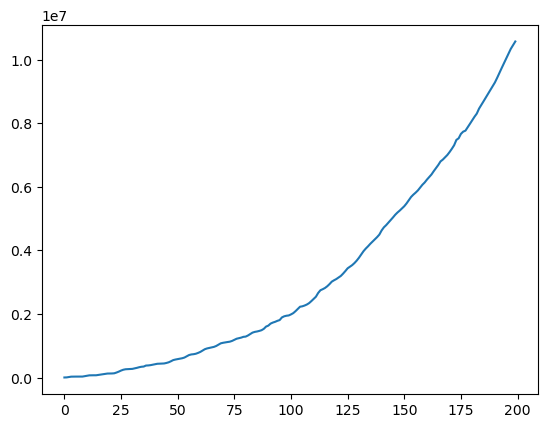

In [53]:
datanum = cleanNAN(datanum)
plt.plot(datanum)

Select the first 200 data points and generate xdata

In [54]:
datanum = datanum[0:200]
xdata = np.linspace(0, len(datanum)-1, len(datanum))

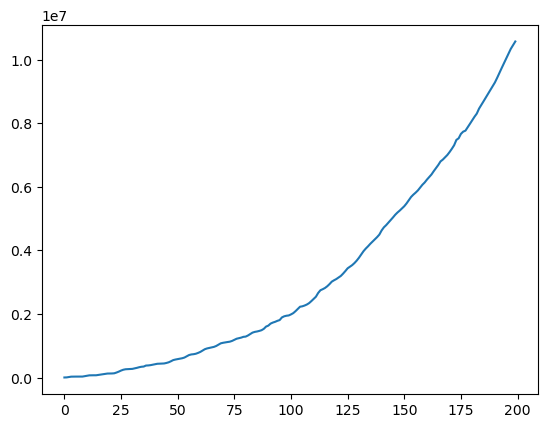

In [55]:
plt.plot(xdata, datanum)

Define an exponential function $y(x) = O + A \times (1+R)^2$ where O is the offset, A the amplitude (starting value) and R is the rate of change.

In [15]:
def exponentialFit(xdata, offset, amplitude, rate):
    out = offset + amplitude * (1+xdata)**rate
    return out
xdata = np.linspace(0, len(datanum), len(datanum))

In [16]:
from scipy.optimize import curve_fit

In [17]:
popt, pcov = curve_fit(exponentialFit, xdata, datanum)

In [18]:
popt

array([1.43885987e+05, 2.55207142e+01, 2.43371679e+00])

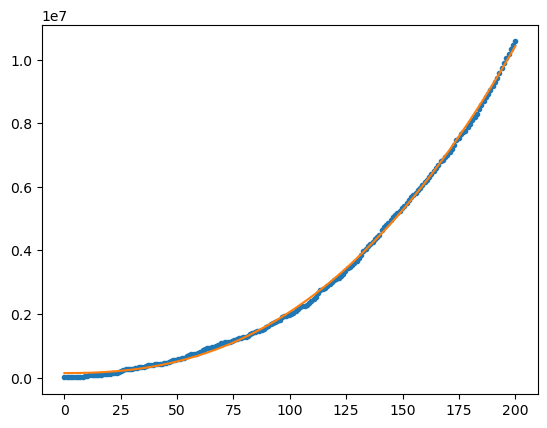

In [23]:
plt.plot(xdata, datanum,'.')
plt.plot(xdata, exponentialFit(xdata,*popt))

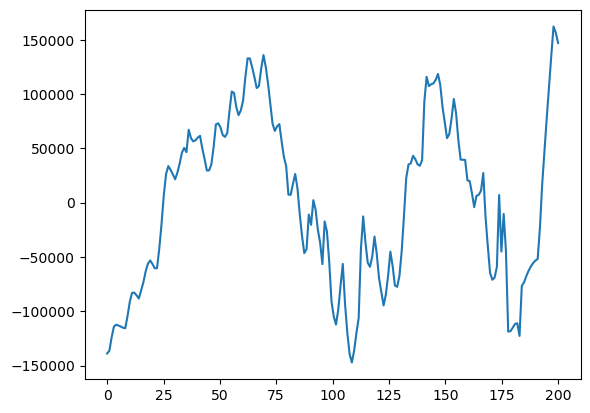

In [24]:
plt.plot(xdata, datanum - exponentialFit(xdata,*popt))

In [2]:
print('test')

test
